<a href="https://colab.research.google.com/github/vkslogan/MEM/blob/main/3_plantas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

Se provee de una base de datos de plantas (actualizada hasta 2018). Cada fila es una planta. Los datos son a nivel SEN. Incluye BC y BCS

In [ ]:
plantas = pd.read_excel('BDGPIIRCE.xlsx')
plantas

,Central/Proyecto 1/,Tecnología,Combustible,Clave de combustible 2/,Región de Control,Región de Transmisión,Unidad a retirar,Capacidad (MW),Capacidad Firme (MW),Régimen Térmico (GJ/MWh) 7/,Usos propios (%),Costos Variables (dólares/MWh),Costos Fijos (dolares/kW/año),Tasa de mantenimiento (%),Tasa de salida forzada (%),Costo de inversión (dólares/kW),Vida Económica (años),Año de instalación,Tiempo medio de reparación\n(horas)
0,Baja California III (La Jovita),Ciclo Combinado,Gas Natural,GN_JOV,08-Baja California,47-Ensenada,NaN,294,285,7.0,3,3.0,16,5.2,8.8,NaN,NaN,NaN,24
1,Cerro Prieto I U5,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,ü,30,29,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
2,Cerro Prieto II U1,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,NaN,110,104,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
3,Cerro Prieto II U2,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,NaN,110,104,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
4,Cerro Prieto III U1,Geotérmica,NaN,NaN,08-Baja California,48-Mexicali,NaN,110,104,NaN,5,0.0,84,5.4,13.2,NaN,NaN,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764,Mazatlán II (José Aceves Pozos) U3,Termoeléctrica convencional,Gas Natural,GN_MAZ,04-Noroeste,06-Mazatlán,NaN,300,276,21.0,8,2.0,29,13.0,6.7,NaN,NaN,NaN,24
765,Topolobampo II (Juan de Dios Bátiz) U1,Termoeléctrica convencional,Gas Natural,GN_TOPO,04-Noroeste,04-Los Mochis,ü,160,147,21.0,8,3.0,36,13.0,6.7,NaN,NaN,NaN,24
766,Topolobampo II (Juan de Dios Bátiz) U2,Termoeléctrica convencional,Gas Natural,GN_TOPO,04-Noroeste,04-Los Mochis,ü,160,147,21.0,8,3.0,36,13.0,6.7,NaN,NaN,NaN,24
767,Villa de Reyes U1,Termoeléctrica convencional,Gas Natural,GN_TAMZ,03-Occidental,25-San Luis Potosí,NaN,350,322,21.0,8,2.0,29,10.1,6.7,NaN,NaN,NaN,24


Quiero concoer los combustibles utilizados en México

In [ ]:
plantas['Combustible'].unique()

array(['Gas Natural', nan, 'Diésel', 'Combustóleo ', 'Carbón', 'Uranio',
       'Biogás', 'Gas residual', 'Vapor', 'Bagazo de caña', 'Gas L.P.',
       'Coque'], dtype=object)

Quiero conocer las tecnologías existentes en México

In [ ]:
plantas['Tecnología'].unique()

array(['Ciclo Combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Ciclo combinado', 'Termoeléctrica convencional',
       'Combustión Interna', 'Hidroeléctrica', 'Carboeléctrica', 'Eólica',
       'Nucleoeléctrica', 'Bioenergía', 'Termoeléctrica Convencional',
       'Cogeneración Eficiente', 'Combustión interna', 'Lecho Fluidizado'],
      dtype=object)

Para reemplazar una mala etiqueta podemos hacer uso del siguiente método. El primer argumento es la etiqueta mala y el segundo argumento es la etiqueta por la que quiero cambiar

In [ ]:
plantas.replace('Ciclo Combinado','Ciclo combinado')
plantas['Tecnología'].unique()

array(['Ciclo Combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Ciclo combinado', 'Termoeléctrica convencional',
       'Combustión Interna', 'Hidroeléctrica', 'Carboeléctrica', 'Eólica',
       'Nucleoeléctrica', 'Bioenergía', 'Termoeléctrica Convencional',
       'Cogeneración Eficiente', 'Combustión interna', 'Lecho Fluidizado'],
      dtype=object)

In [ ]:
plantas.replace('Ciclo Combinado','Ciclo combinado',inplace=True)
plantas.replace('Termoeléctrica Convencional','Termoeléctrica convencional',inplace=True)
plantas.replace('Combustión Interna','Combustión interna',inplace=True)
plantas['Tecnología'].unique()

array(['Ciclo combinado', 'Geotérmica', 'Solar fotovoltaica', 'Turbogás',
       'Termoeléctrica convencional', 'Combustión interna',
       'Hidroeléctrica', 'Carboeléctrica', 'Eólica', 'Nucleoeléctrica',
       'Bioenergía', 'Cogeneración Eficiente', 'Lecho Fluidizado'],
      dtype=object)

Quiero conocer la cantidad de MW Instalados por Tecnología en cada gerencia de control regional

In [ ]:
tech_plantas = plantas.groupby(['Región de Control','Tecnología'])['Capacidad Firme (MW)'].sum().reset_index()
tech_plantas

,Región de Control,Tecnología,Capacidad Firme (MW)
0,01-Central,Bioenergía,34
1,01-Central,Carboeléctrica,2579
2,01-Central,Ciclo combinado,783
3,01-Central,Cogeneración Eficiente,81
4,01-Central,Combustión interna,28
...,...,...,...
73,10-Mulegé,Combustión interna,39
74,10-Mulegé,Eólica,0
75,10-Mulegé,Geotérmica,10
76,10-Mulegé,Solar fotovoltaica,0


Hacemos uso del método pivot para crear una tabla donde las filas sean las tecnologías y las columnas sean las gerencias de control regional. y los valores serán la columna con las suma

In [ ]:
tech_pivot = tech_plantas.pivot(index='Tecnología',columns='Región de Control', values='Capacidad Firme (MW)')
tech_pivot

Región de Control,01-Central,02-Oriental,03-Occidental,04-Noroeste,05-Norte,06-Noreste,07-Penínsular,08-Baja California,09-Baja California Sur,10-Mulegé
Tecnología,,,,,,,,,,
Bioenergía,34.0,217.0,153.0,NaN,11.0,58.0,12.0,NaN,NaN,NaN
Carboeléctrica,2579.0,NaN,NaN,NaN,NaN,2412.0,NaN,NaN,NaN,NaN
Ciclo combinado,783.0,3822.0,2535.0,1459.0,2742.0,9213.0,1348.0,1750.0,NaN,NaN
Cogeneración Eficiente,81.0,755.0,10.0,14.0,NaN,177.0,13.0,21.0,NaN,NaN
Combustión interna,28.0,103.0,107.0,10.0,61.0,117.0,5.0,5.0,304.0,39.0
Eólica,NaN,505.0,14.0,0.0,NaN,158.0,0.0,0.0,NaN,0.0
Geotérmica,NaN,65.0,247.0,NaN,NaN,NaN,NaN,541.0,NaN,10.0
Hidroeléctrica,1456.0,4900.0,2668.0,230.0,36.0,96.0,NaN,NaN,NaN,NaN
Lecho Fluidizado,NaN,NaN,NaN,NaN,NaN,538.0,NaN,NaN,NaN,NaN


Con esta función podemos ordenar nuestro dataframe de forma ascendente/descendete de acuerdo a los vaalores de una columna

In [ ]:
plantas.sort_values(by='Régimen Térmico (GJ/MWh) 7/',ascending=False)

,Central/Proyecto 1/,Tecnología,Combustible,Clave de combustible 2/,Región de Control,Región de Transmisión,Unidad a retirar,Capacidad (MW),Capacidad Firme (MW),Régimen Térmico (GJ/MWh) 7/,Usos propios (%),Costos Variables (dólares/MWh),Costos Fijos (dolares/kW/año),Tasa de mantenimiento (%),Tasa de salida forzada (%),Costo de inversión (dólares/kW),Vida Económica (años),Año de instalación,Tiempo medio de reparación\n(horas)
13,Mexicali U1,Turbogás,Diésel,DIE_MEXICALI,08-Baja California,48-Mexicali,ü,26,24,22.0,3,5.0,5,1.8,6.8,NaN,NaN,NaN,24
14,Mexicali U2,Turbogás,Diésel,DIE_MEXICALI,08-Baja California,48-Mexicali,ü,18,17,22.0,3,5.0,5,1.8,6.8,NaN,NaN,NaN,24
15,Mexicali U3,Turbogás,Diésel,DIE_MEXICALI,08-Baja California,48-Mexicali,ü,18,17,22.0,3,5.0,5,1.8,6.8,NaN,NaN,NaN,24
768,Villa de Reyes U2,Termoeléctrica convencional,Gas Natural,GN_TAMZ,03-Occidental,25-San Luis Potosí,NaN,350,322,21.0,8,2.0,29,10.1,6.7,NaN,NaN,NaN,24
191,Guaymas II (Carlos Rodríguez Rivero) U2,Termoeléctrica convencional,Combustóleo,COMB_GUAY,04-Noroeste,03-Obregón,ü,84,77,21.0,8,4.0,45,13.0,6.7,NaN,NaN,NaN,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756,Eólica Tres Mesas 2,Eólica,NaN,NaN,06-Noreste,21-Güémez,NaN,86,15,NaN,1,NaN,38,2.0,1.0,NaN,NaN,NaN,24
759,Ventika II,Eólica,NaN,NaN,06-Noreste,14-Reynosa,NaN,126,23,NaN,1,NaN,38,2.0,1.0,NaN,NaN,NaN,24
760,Ventika,Eólica,NaN,NaN,06-Noreste,14-Reynosa,NaN,126,23,NaN,1,NaN,38,2.0,1.0,NaN,NaN,NaN,24
761,Vientos del Altiplano,Eólica,NaN,NaN,06-Noreste,17-Saltillo,NaN,140,18,NaN,1,NaN,38,2.0,1.0,NaN,NaN,NaN,24


In [ ]:
import matplotlib.pyplot as plt


Obtenemos un dataframe con los datos de ciclo combinado por GCR

In [ ]:
ciclos = tech_plantas.loc[tech_plantas['Tecnología']=='Ciclo combinado']
ciclos

,Región de Control,Tecnología,Capacidad Firme (MW)
2,01-Central,Ciclo combinado,783
10,02-Oriental,Ciclo combinado,3822
20,03-Occidental,Ciclo combinado,2535
29,04-Noroeste,Ciclo combinado,1459
38,05-Norte,Ciclo combinado,2742
46,06-Noreste,Ciclo combinado,9213
55,07-Penínsular,Ciclo combinado,1348
61,08-Baja California,Ciclo combinado,1750


## Barplot

<BarContainer object of 8 artists>

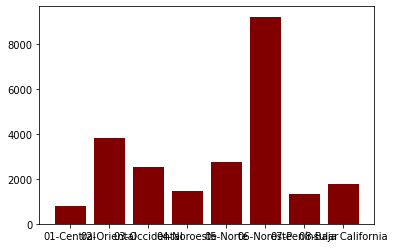

In [ ]:
plt.bar(ciclos['Región de Control'], ciclos['Capacidad Firme (MW)'], color ='maroon', width = 0.8)

([<matplotlib.patches.Wedge at 0x7fa16c6280d0>,
 [Text(1.0940562746936544, 0.11419661905434568, '01-Central'),
  Text(0.8301230329643995, 0.7217310788250612, '02-Oriental'),
  Text(0.01183457062196691, 1.0999363358568504, '03-Occidental'),
  Text(-0.5463264283135899, 0.9547394585572109, '04-Noroeste'),
  Text(-0.9689832456840185, 0.520645243504313, '05-Norte'),
  Text(-0.5039665705267418, -0.9777615741025594, '06-Noreste'),
  Text(0.8797110040420915, -0.6603851522916422, '07-Penínsular'),
  Text(1.0704167069508408, -0.2533931204285503, '08-Baja California')])

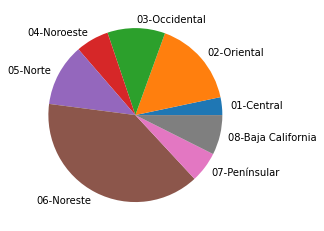

In [ ]:
plt.pie(ciclos['Capacidad Firme (MW)'],labels=ciclos['Región de Control'])